In [1]:
_#importing libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
#importing the dataset
train_data=pd.read_csv('mobile_price_range_data.csv')
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
train_data.shape

(2000, 21)

In [6]:
train_data_f = train_data[train_data['sc_w'] != 0]
train_data_f.shape

(1820, 21)

In [7]:
train_data_f = train_data[train_data['sc_w'] != 0]
train_data_f.shape

(1820, 21)

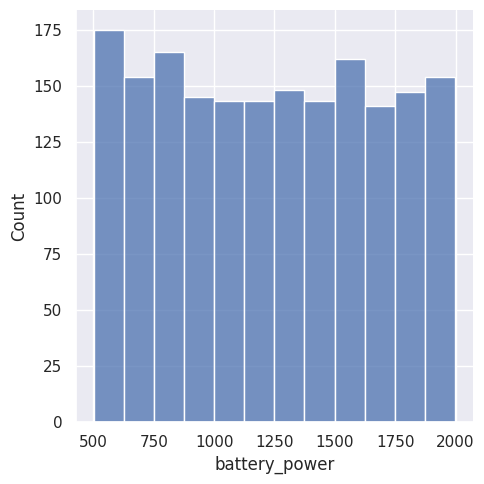

In [8]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["battery_power"])
plt.show()

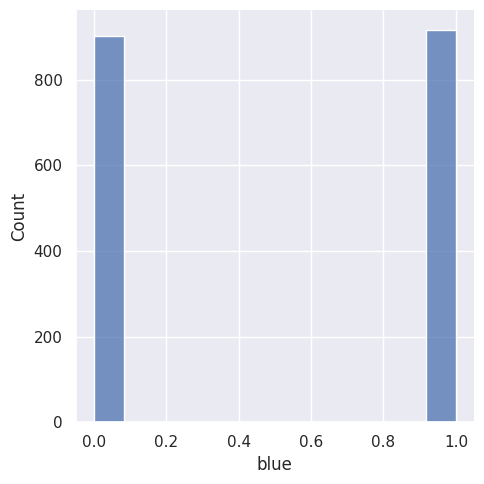

In [9]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["blue"])
plt.show()

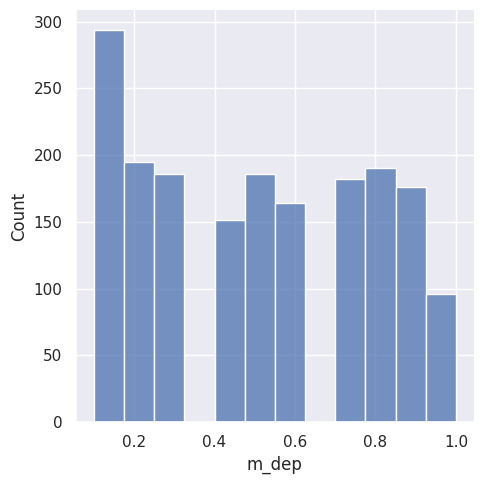

In [10]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["m_dep"])
plt.show()

In [11]:
X=train_data_f.drop(['price_range'], axis=1)
y=train_data_f['price_range']
#missing values
X.isna().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
dtype: bool

In [12]:
#train test split of data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid= train_test_split(X, y, test_size=0.2, random_state=7)

In [13]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

In [14]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=25)

In [15]:
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_valid)

In [16]:
df = pd.DataFrame({'Actual': y_valid, 'Predicted': y_pred_knn})

In [17]:
df

,Actual,Predicted
1190,0,0
608,2,2
1824,2,2
1749,3,3
1227,2,2
...,...,...
866,2,2
1862,0,0
991,1,1
129,0,0


KNN Classifier Accuracy Score:  0.9340659340659341
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        95
           1       0.93      0.97      0.95        92
           2       0.87      0.88      0.88        86
           3       0.94      0.90      0.92        91

    accuracy                           0.93       364
   macro avg       0.93      0.93      0.93       364
weighted avg       0.93      0.93      0.93       364



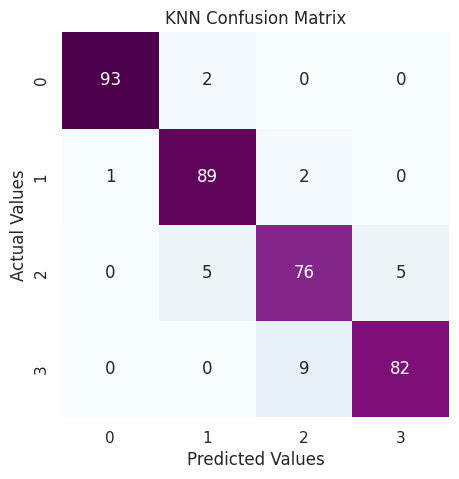

In [18]:
print('KNN Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_knn))
cm_rfc=my_confusion_matrix(y_valid, y_pred_knn, 'KNN Confusion Matrix')

In [19]:
#Logistic Regression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.fit_transform(X_valid)

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred_lrc = classifier.predict(X_valid)

In [22]:
df = pd.DataFrame({'Actual': y_valid, 'Predicted': y_pred_lrc})

In [23]:
df

,Actual,Predicted
1190,0,0
608,2,2
1824,2,2
1749,3,3
1227,2,2
...,...,...
866,2,2
1862,0,0
991,1,1
129,0,0


Logistic Regression Classification Accuracy Score:  0.9615384615384616
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        95
           1       0.98      0.95      0.96        92
           2       0.90      0.97      0.93        86
           3       0.97      0.96      0.96        91

    accuracy                           0.96       364
   macro avg       0.96      0.96      0.96       364
weighted avg       0.96      0.96      0.96       364



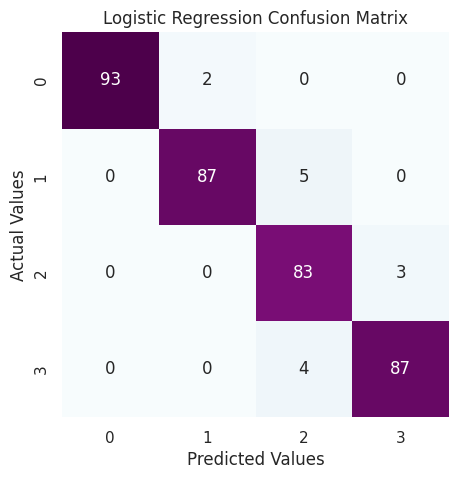

In [24]:
print('Logistic Regression Classification Accuracy Score: ',accuracy_score(y_valid,y_pred_lrc))
cm_lrc=my_confusion_matrix(y_valid, y_pred_lrc, 'Logistic Regression Confusion Matrix')

In [25]:
#Decision Tree Classifier
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.fit_transform(X_valid)

In [26]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred_dtc = clf.predict(X_valid)

In [27]:
df = pd.DataFrame({'Actual': y_valid, 'Predicted': y_pred_dtc})

In [28]:
df

,Actual,Predicted
1190,0,0
608,2,3
1824,2,2
1749,3,2
1227,2,2
...,...,...
866,2,2
1862,0,1
991,1,1
129,0,0


Decision Tree Classification Accuracy Score:  0.8296703296703297
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        95
           1       0.80      0.82      0.81        92
           2       0.71      0.77      0.74        86
           3       0.87      0.84      0.85        91

    accuracy                           0.83       364
   macro avg       0.83      0.83      0.83       364
weighted avg       0.83      0.83      0.83       364



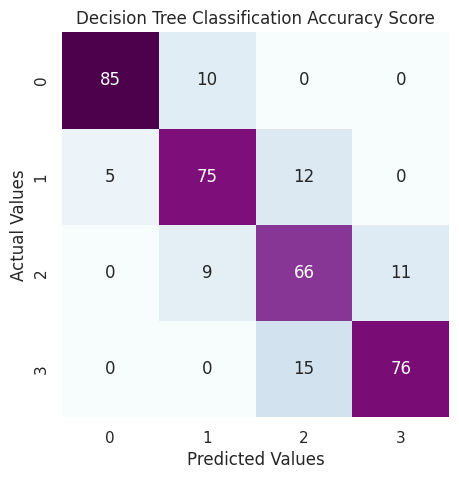

In [29]:
print('Decision Tree Classification Accuracy Score: ',accuracy_score(y_valid,y_pred_dtc))
cm_dtc=my_confusion_matrix(y_valid, y_pred_dtc, 'Decision Tree Classification Accuracy Score')

In [30]:
print('KNN Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_knn)*100)
print('Logistic Regression Classification Accuracy Score: ',accuracy_score(y_valid,y_pred_lrc)*100)
print('Decision Tree Classification Accuracy Score: ',accuracy_score(y_valid,y_pred_dtc)*100)

KNN Classifier Accuracy Score:  93.4065934065934
Logistic Regression Classification Accuracy Score:  96.15384615384616
Decision Tree Classification Accuracy Score:  82.96703296703298


In [31]:
#LOGISTIC REGRESSION HAS THE BEST ACCURACY